In [63]:
from matplotlib import pyplot as plt
import random
import math

In [ ]:
def eucl_dist(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

# store xk values and angles for later inspection
t = []
true_angles = []
false_angles = []

def angle_at_xk(xk, x1, y1, x2, y2):
    ux, uy = x1 - xk, y1
    vx, vy = x2 - xk, y2
    nu = math.hypot(ux, uy)
    nv = math.hypot(vx, vy)
    if nu == 0 or nv == 0:
        return float('nan')
    dot = ux * vx + uy * vy
    # clamp to avoid tiny FP errors outside [-1, 1]
    cos_theta = max(-1.0, min(1.0, dot / (nu * nv)))
    return math.acos(cos_theta)


def experiment():
    x1, y1 = random.random(), random.random()
    x2, y2 = random.random(), random.random()

    side_x = 1 if x1 > 0.5 else 0
    side_y = 1 if y1 > 0.5 else 0

    if side_x != 0 and side_y != 0:
        experiment()

    xk = (x1+x2)/2 + (y2**2 - y1**2)/(2*(x2-x1))

    t.append(xk)
    # compute and store the angle at (xk, 0) between the two rays

    ok = True
    if xk >= 0 and xk <= 1:
        true_angles.append(angle_at_xk(xk, x1, y1, x2, y2))
        return 1
    false_angles.append(angle_at_xk(xk, x1, y1, x2, y2))
    return 0


In [ ]:

hits = 0
trials = 1000
for i in range(trials):
    hits += experiment()




1.499314954223715
0.7713392728966747
0.6693773044775008
1.7171983923424325
1.152235469444624
0.8810467144322882
0.8183460971771458
0.22659348479413602
0.7492239550199409
1.2853162812050292
0.5109228018418689
0.3565444334350952
0.9041827388978785
0.38637262313132203
0.5986623409874494
1.6590075784666998
1.0115684625275219
1.0056349149621182
1.3107794998848996
1.4289422589381264
1.8344958124788309
1.1422849036189482
0.12077630912676549
1.304163522392133
1.1905043308841199
0.6829209482382487
1.0909071949640883
1.0323331348061116
0.8482717341559102
1.615972590545944
0.8763822577988125
0.43129930459637894
0.26912835734400137
1.0431191259227195
1.2216098001090077
0.44948273825555973
0.7046245161193146
2.644534317195053
0.6677908580031597
2.3476553771329267
1.4206960430343307
0.6782627217134518
0.9995024863558462
1.019711434131992
1.1004248984781269
1.5049601318278059
0.2396465493209993
1.9631916295847203
0.21814539310034062
0.8851246065680259
0.6596536557783592
0.3424312422532196
1.169410327

(array([1.1000e+01, 1.3439e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1429.31030965,  -164.92301277,  1099.46428411,  2363.85158098,
         3628.23887786,  4892.62617474,  6157.01347162,  7421.40076849,
         8685.78806537,  9950.17536225, 11214.56265913]),
 <BarContainer object of 10 artists>)

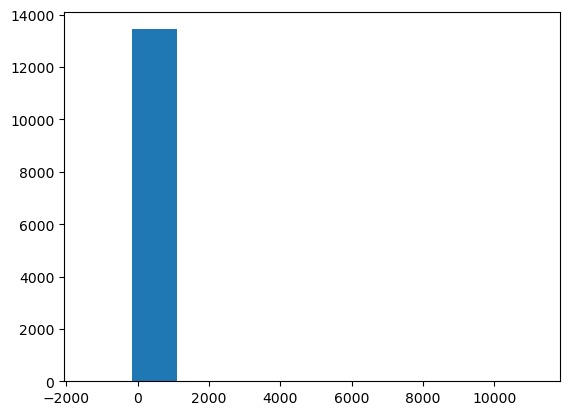

In [ ]:
# our problem is that we can't really use monte-carlo
# we need to analytically find the points where x2, y2 are within bounds 
